In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/insurance2.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
X = df[[
    "age",
    "sex",
    "bmi",
    "children",
    "smoker",
    "region"
]]

y = df["charges"]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)


In [6]:
from sklearn.ensemble import RandomForestRegressor
premium_prediction = RandomForestRegressor(
    n_estimators=100,
    
    n_jobs=-1,
    random_state=42
)


In [7]:
premium_prediction.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred = premium_prediction.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))
print()
importance = pd.Series(
    premium_prediction.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


MAE : 2607.8613823558208
MSE : 23289296.27316685
R2  : 0.8456549780274321



smoker      0.612032
bmi         0.210081
age         0.137732
children    0.020060
region      0.013903
sex         0.006192
dtype: float64

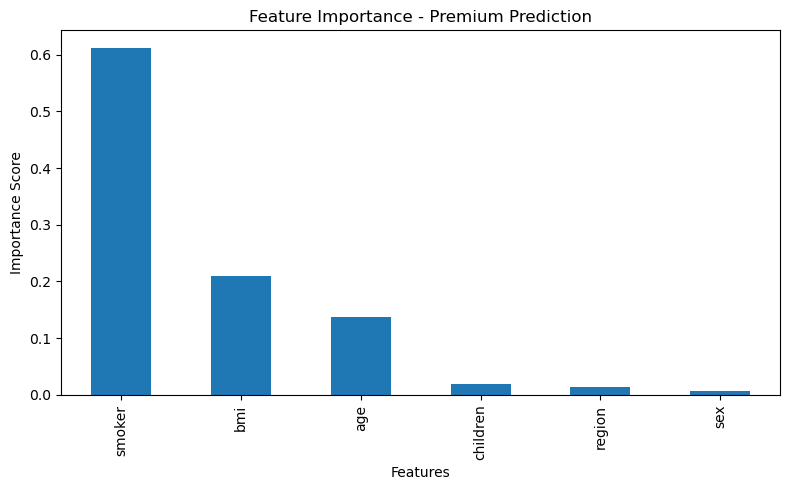

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
importance.plot(kind="bar")
plt.title("Feature Importance - Premium Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [11]:
import joblib

joblib.dump(
    premium_prediction,
    r"D:\Life_Insurance_Claim_Prediction\models\premium_model.pkl"
)
print("Premium model saved successfully")


Premium model saved successfully


In [12]:
joblib.load(
    r"D:\Life_Insurance_Claim_Prediction\models\premium_model.pkl"
)
print("Premium model load OK")


Premium model load OK
